In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("data/zuu crew scores.csv")
df

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
3,Nisal Gamage,1,74.5,63.9,7,0,76.8,1.7,Production-Ready ML Systems,100.0
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
...,...,...,...,...,...,...,...,...,...,...
145,Student_146,3,83.9,13.3,6,0,48.9,2.9,Foundations of ML,31.9
146,Student_147,3,73.4,64.9,5,0,77.0,4.5,Production-Ready ML Systems,47.9
147,Student_148,3,90.8,55.2,4,1,68.3,4.6,Foundations of ML,52.8
148,Student_149,2,64.3,14.6,4,0,44.6,2.7,Production-Ready ML Systems,29.6


In [4]:
X = df["Attendance"].values.reshape(-1,1)
Y = df["CapstoneScore"].values

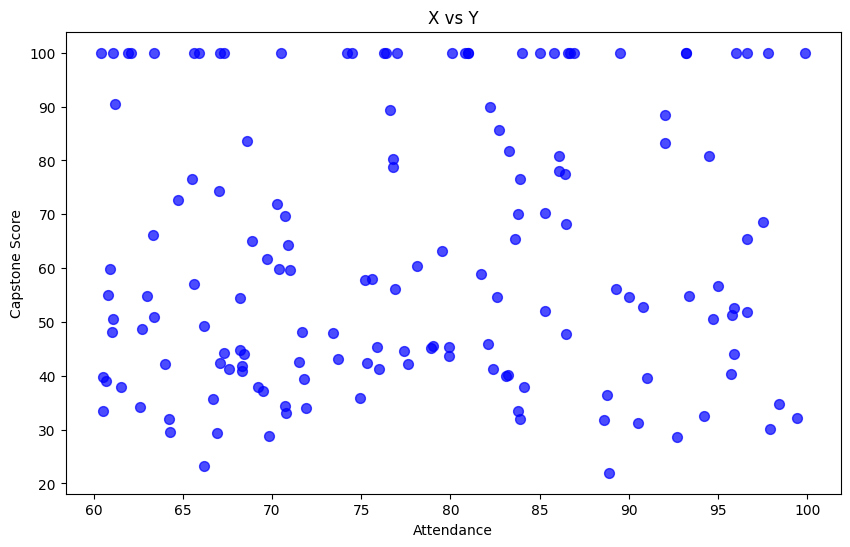

In [5]:
plt.figure(figsize=(10, 6))
plt.scatter(X, Y, alpha=0.7, color='blue', s=50)
plt.xlabel('Attendance')
plt.ylabel('Capstone Score')
plt.title('X vs Y')
plt.show()